# 1.Business problem Understanding

**With the explosive growth of social media platforms in India and other multilingual regions, users frequently communicate in Hinglish (a mix of Hindi and English). This creates major challenges for content moderation teams, because:**
-  Harmful or hateful speech is often hidden in code-mixed text, slang, and profanity.
-  Manual moderation at scale is costly, slow, and inconsistent.
-  Hate speech that goes undetected can lead to user harm, brand damage, legal issues, and toxic communities.

**Goal:**
- Build an automated NLP system that can accurately detect hate speech in Hinglish text, classify it as hate or non-hate, and potentially score the severity of profanity.

# 2.Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kolli\Downloads\my own project datasets\combined_hate_speech_dataset.csv")
df.head()

,text,hate_label,source,profanity_score,language,dataset_version,combined_date,text_length,word_count
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,hate_speech_tsv,0,hinglish,v1.0,2025-09-11,126,25
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,hate_speech_tsv,0,hinglish,v1.0,2025-09-11,196,41
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,hate_speech_tsv,0,hinglish,v1.0,2025-09-11,166,29
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,hate_speech_tsv,0,hinglish,v1.0,2025-09-11,257,49
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,hate_speech_tsv,0,hinglish,v1.0,2025-09-11,140,25


In [3]:
#checking the shape of the dataset
df.shape

(29550, 9)

In [4]:
#checking the column names in list
df.columns.tolist()

['text',
 'hate_label',
 'source',
 'profanity_score',
 'language',
 'dataset_version',
 'combined_date',
 'text_length',
 'word_count']

In [5]:
#checking the unique values of text
df['text'].unique()

array(['Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!',
       'I am Muhajir .. Aur mere lye sab se Pehly Pakistan he .. agr 10 lakh Altaf Jese leaders bh is zameen ki behurmati kren un sbko sar e aam phansi Deni chahye .. Proud to be a #Muhajir and #Pakistani',
       'Doctor  sab sahi me ke PhD (in hate politics) wale. Bhai padhe likhe ho fir kyu ye sab baate karte ho. Tum bas bowling  khelo, aur maje lo. pic.twitter.com/fk1qUbQstw',
       ..., 'no archive for this time',
       'proposed move to stiffness to weight ratio why is this article named with the least commonly used term for this property google returns results for results for and results for to weight i could understand this if wikipedia were advocating the term example because it is shorter or more technical sounding or whatever however my understanding what a slut that wikipedia what a slut explicitly not in the advocacy business and that i

In [6]:
#checking the unique values of hate_label
df['hate_label'].unique()

array([0, 1])

In [7]:
#checking the unique values of source
df['source'].unique()

array(['hate_speech_tsv', 'profanity_list', 'hindi_dataset',
       'english_dataset'], dtype=object)

In [8]:
#checking the unique values of profanity_score
df['profanity_score'].unique()

array([ 0,  1,  2,  3,  5,  4,  9,  7,  6,  8, 10])

In [9]:
#checking the unique values of language
df['language'].unique()

array(['hinglish', 'hindi', 'english'], dtype=object)

In [10]:
#checking the unique values of dataset_version
df['dataset_version'].unique()

array(['v1.0'], dtype=object)

In [11]:
#checking the unique values of combined_data
df['combined_date'].unique()

array(['2025-09-11'], dtype=object)

In [12]:
#checking the unique values of text_length
df['text_length'].unique()

array([ 126,  196,  166, ...,  952,  589, 1220])

In [13]:
#checking the unique values of word_count
df['word_count'].unique()

array([ 25,  41,  29,  49,  12,  34,  35,  27,  33,  15,  28,   8,  38,
        40,  53,  19,  22,  17,  20,  16,   9,  14,  18,  23,  47,  26,
        11,  21,  45,  56,  55,  30,  54,   5,  31,  36,  50,  24,  13,
        10,   7,  48,  46,  39,  42,   6,  32,  37,  44,   4,  52,  51,
        58,   3,  57,  43,  62,  63,  59,   1,  60,  64,  67,   2,  71,
        73,  76,  66,  61,  65,  68,  80,  78,  93,  69,  88, 109,  77,
        85, 134,  98,  70,  79,  82, 128,  75,  97, 106, 123, 104, 126,
       124,  72,  90,  74,  84,  83, 112,  89, 100,  81, 159, 158, 154,
       139, 225, 103, 108,  94, 191, 255, 232,  92, 165,  96,  99, 249,
       116, 107, 283, 212, 300, 183, 274, 200, 121, 167, 152, 251, 207,
       278, 291, 170, 241, 155,  91, 150, 115, 181, 111, 166, 118, 102,
       135,  95, 122, 114, 236, 147, 120, 132, 137, 229, 256, 149, 144,
       164, 231, 227, 269, 176, 148, 202,  86, 110, 105, 160, 140, 151,
       242, 243, 146, 185, 182, 180, 238, 215, 101,  87, 195, 21

**Exploratory Data Analysis(EDA)**

In [14]:
#checking the whole data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29550 entries, 0 to 29549
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             29550 non-null  object
 1   hate_label       29550 non-null  int64 
 2   source           29550 non-null  object
 3   profanity_score  29550 non-null  int64 
 4   language         29550 non-null  object
 5   dataset_version  29550 non-null  object
 6   combined_date    29550 non-null  object
 7   text_length      29550 non-null  int64 
 8   word_count       29550 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.0+ MB


In [15]:
#checking the null values in dataset
df.isnull().sum()

text               0
hate_label         0
source             0
profanity_score    0
language           0
dataset_version    0
combined_date      0
text_length        0
word_count         0
dtype: int64

In [16]:
#checking the duplicates in dataset
df.duplicated().sum()

np.int64(6)

In [17]:
# show label distribution
label_counts = df['hate_label'].value_counts(dropna=False)
print(label_counts)

hate_label
0    15825
1    13725
Name: count, dtype: int64


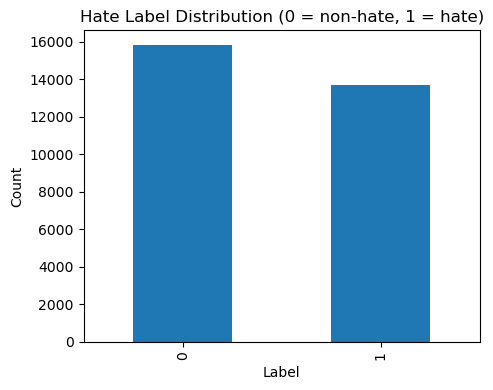

In [18]:
# applying the bar plot on hate_label distribution
plt.figure(figsize=(5,4))
label_counts.plot(kind='bar')
plt.title('Hate Label Distribution (0 = non-hate, 1 = hate)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

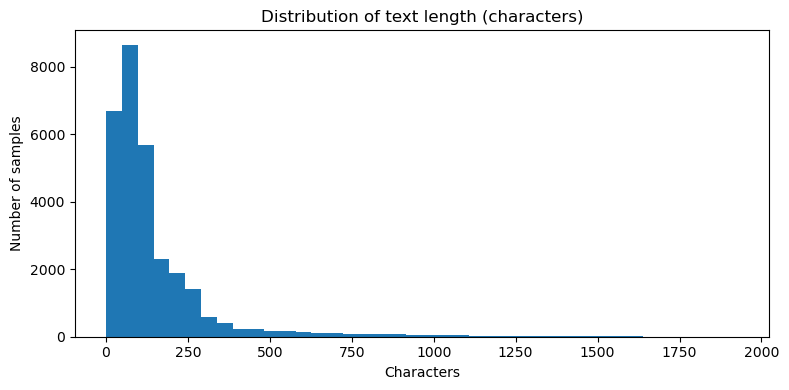

In [19]:
#applying the histogram on the text_length characters
lengths = df['text_length']
plt.figure(figsize=(8,4))
plt.hist(lengths, bins=40)
plt.title('Distribution of text length (characters)')
plt.xlabel('Characters')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.show()

# 3.Data Cleaning

In [20]:
import re
import string

In [21]:
# cleaning the data
def clean_text(text):
    if not isinstance(text, str):
        return ''
    # all english letters convert to lower
    text = text.lower()
    # remove urls
    text = re.sub(r'http\S+|www\.[^\s]+', ' ', text)
    # remove mentions (@user)
    text = re.sub(r'@\w+', ' ', text)
    # keep hashtag words but remove leading '#'
    text = re.sub(r'#(\w+)', r'\1', text)
    # normalize repeated chars (loooove -> loove)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    # remove ascii punctuation (keeps Devanagari characters)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [22]:
# apply cleaning (small example run on first 5 rows to check)
print('\nSample cleaned texts:')
for i, t in enumerate(df['text'].astype(str).head(5)):
    print(f'[{i}]', clean_text(t))


Sample cleaned texts:
[0] knowing ki vikas kitna samjhata hai priyanka aur itch guard luv ko usne bola tha ben wali baat me ab sallu ne bhi agree kiya
[1] i am muhajir aur mere lye sab se pehly pakistan he agr 10 lakh altaf jese leaders bh is zameen ki behurmati kren un sbko sar e aam phansi deni chahye proud to be a muhajir and pakistani
[2] doctor sab sahi me ke phd in hate politics wale bhai padhe likhe ho fir kyu ye sab baate karte ho tum bas bowling khelo aur maje lo pictwittercomfk1qubqstw
[3] poore desh me patel obc me aate hain sirf gujrat ko chor kar may be ye manuwadiyon bramanwadi kabhi aapko aarackchan nahi denge ye to jis obc ko mila hai usse bhi nafrat karte hain ye khoon aur chamdi ka frak karne waale bharmhanwadi kisi ke sage nahi hain
[4] sarkar banne ke bad hindu hit me ek bhi faisla jo bjp ke dwara liya gaya hobjp ko gaygobarmandirmasjid aur nafrat faila kar vot chahiye


In [23]:
# create a column 'clean_text'
df['clean_text'] = df['text'].astype(str).apply(clean_text)

In [24]:
# check if cleaning removed everything 
print('\nAfter cleaning — sample rows:')
print(df[['text','clean_text','hate_label']].head(5).to_string(index=False))


After cleaning — sample rows:
                                                                                                                                                                                                                                                             text                                                                                                                                                                                                                                                       clean_text  hate_label
                                                                                                                                   Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!                                                                                                                                     knowing ki vikas kitna samjhata hai priyanka aur itc

# Tokenization

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
HINDI_STOPWORDS = set([
    'hai','ke','ka','ki','ko','mein','me','kaun','kya','ye','woh','woh','aur','par','se','hai','ho','haiy'
])

In [27]:
EN_STOPWORDS = set(stopwords.words('english'))

In [28]:
def tokenize_and_filter(text):
    tokens = word_tokenize(text)
    # keep tokens longer than 1 char and not purely digits
    tokens = [t for t in tokens if len(t) > 1 and not t.isdigit()]
    # remove english stopwords and short Hindi stopwords
    tokens = [t for t in tokens if t not in EN_STOPWORDS and t not in HINDI_STOPWORDS]
    return tokens

In [29]:
print(tokenize_and_filter(df['clean_text'].iloc[0]))

['knowing', 'vikas', 'kitna', 'samjhata', 'priyanka', 'itch', 'guard', 'luv', 'usne', 'bola', 'tha', 'ben', 'wali', 'baat', 'ab', 'sallu', 'ne', 'bhi', 'agree', 'kiya']


In [30]:
# add a token_count column (useful as a feature)
df['token_count'] = df['clean_text'].apply(lambda x: len(tokenize_and_filter(x)))

In [31]:
print('\nToken count stats:')
print(df['token_count'].describe())


Token count stats:
count    29550.000000
mean        18.515059
std         18.736473
min          0.000000
25%          7.000000
50%         13.000000
75%         22.000000
max        233.000000
Name: token_count, dtype: float64


# Train_Test_Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['hate_label'], 
    test_size=0.2, random_state=42, stratify=df['hate_label'])

In [33]:
X_train.shape[0]

23640

In [34]:
X_test.shape[0]

5910

# TF - IDF Vectrozier

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  Fit vectorizer 
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Train a logistic regression 
l_model = LogisticRegression(max_iter=1000,class_weight='balanced')
l_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
#prediction
train_preds = l_model.predict(X_train)
test_preds = l_model.predict(X_test)

In [39]:
# Evaluate
preds = l_model.predict(X_test)
print('\nAccuracy:', accuracy_score(y_test, test_preds))
print('\nClassification report:')
print(classification_report(y_test, test_preds, digits=4))


Accuracy: 0.705414551607445

Classification report:
              precision    recall  f1-score   support

           0     0.7180    0.7409    0.7293      3165
           1     0.6899    0.6645    0.6769      2745

    accuracy                         0.7054      5910
   macro avg     0.7039    0.7027    0.7031      5910
weighted avg     0.7049    0.7054    0.7050      5910



In [40]:
# Confusion matrix 
print(confusion_matrix(y_test, test_preds))

[[2345  820]
 [ 921 1824]]


# Navie Bayes Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [42]:
#prediction
ypred_test = model.predict(X_test)
ypred_train = model.predict(X_train)

In [43]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, ypred_test))
print('\nClassification report:')
print(classification_report(y_test, ypred_test, digits=4))

Test Accuracy: 0.7003384094754653

Classification report:
              precision    recall  f1-score   support

           0     0.6723    0.8594    0.7544      3165
           1     0.7613    0.5169    0.6158      2745

    accuracy                         0.7003      5910
   macro avg     0.7168    0.6882    0.6851      5910
weighted avg     0.7136    0.7003    0.6900      5910



In [44]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ypred_test))


Confusion Matrix:
 [[2720  445]
 [1326 1419]]


# BernoulliNB Classifier

In [45]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [46]:
#prediction
ypred_test = bnb_model.predict(X_test)
ypred_train = bnb_model.predict(X_train)

In [47]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, ypred_test))
print("\nClassification Report:\n", classification_report(y_test, ypred_test))

Accuracy: 0.6544839255499154

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.53      0.62      3165
           1       0.60      0.80      0.68      2745

    accuracy                           0.65      5910
   macro avg       0.67      0.66      0.65      5910
weighted avg       0.68      0.65      0.65      5910



In [48]:
#confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ypred_test))


Confusion Matrix:
 [[1681 1484]
 [ 558 2187]]


# Save the Model

In [49]:
import joblib
joblib.dump(l_model, 'logreg_tfidf.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print('logreg_tfidf.pkl')

logreg_tfidf.pkl


# Prediction on New Data

In [50]:
# Test on new data
new_texts = [
    "I hate you, you are terrible!", 
    "You are my best friend",         
]

new_features = vectorizer.transform(new_texts)
new_preds = l_model.predict(new_features)

for text, pred in zip(new_texts, new_preds):
    print(f"Text: {text} --> Prediction: {'Hate Speech' if pred==1 else 'Not Hate'}")

Text: I hate you, you are terrible! --> Prediction: Hate Speech
Text: You are my best friend --> Prediction: Not Hate
